In [4]:
import torch
import matplotlib.pyplot as plt

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [6]:
from feed_forward.models import FeedForwardNeuralNet
from feed_forward.hyper_params import *

model = FeedForwardNeuralNet(input_size=INPUT_SIZE, hidden_size=HIDDEN_SIZE, num_classes=NUM_CLASSES).to(device)
model.load_state_dict(torch.load('model.ckpt'))

In [7]:
import torchvision
import torchvision.transforms as transforms

test_dataset = torchvision.datasets.MNIST(root='../data', train=False, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=4, shuffle=False)

In [8]:
it = iter(test_loader)

In [9]:
images, labels = next(it)

In [10]:
grid_img = torchvision.utils.make_grid(images, nrow=2)

tensor([7, 2, 1, 0])


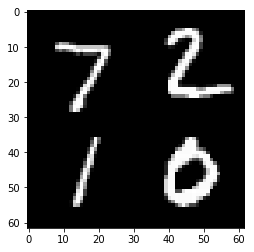

In [11]:
print(labels)
plt.imshow(grid_img.permute(1, 2, 0))

In [12]:
img0, img1, img2, img3 = images

In [13]:
outputs = model(img3.reshape(-1, 28 * 28).to(device))

In [14]:
_, predicted = torch.max(outputs.data, 1)

In [15]:
print(predicted)

tensor([0], device='cuda:0')
